### Level 1

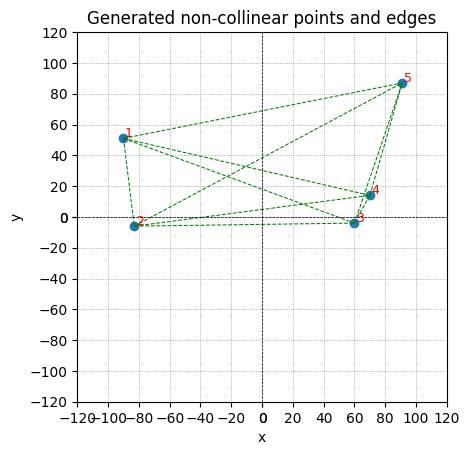

points:
x       y
-90     51
-83     -6
60      -4
70      14
91      87

circular sequence
1 2 3 4 5 
2 1 3 4 5 
2 3 1 4 5 
2 3 4 1 5 
3 2 4 1 5 
3 4 2 1 5 
3 4 2 5 1 
3 4 5 2 1 
4 3 5 2 1 
4 5 3 2 1 
5 4 3 2 1 

crossing number: 5
crossing number (brute force): 5


In [ ]:
import sys, math, random, itertools
import numpy as np
import matplotlib.pyplot as plt

def slope(p1, p2): # calculate slope between two points
  x1, y1 = p1
  x2, y2 = p2
  if x1 == x2:
    return -np.inf # vertical line
  else:
    return (y1 - y2) / (x1 - x2)

def init_points(n=4, min_coord=-10, max_coord=10):
  points = np.zeros((n, 2)) # store points
  ct = 0 # track number of points generated
  while ct < n:
    x, y = random.randint(min_coord, max_coord), random.randint(min_coord, max_coord) # randomly generate point
    new_slopes = np.array([slope((x, y), p) for p in points[:ct]]) # find slopes with existing points
    if (x, y) not in points and len(np.unique(new_slopes)) == len(new_slopes): # check if all slopes unique (otherwise, collinear triad exists)
      points[ct] = np.array([x, y]) # add point
      ct += 1
  return -np.array(sorted(points, key=lambda p: p[0], reverse=True))

def generate_slopes(points):
  n = len(points)
  slopes = np.zeros((n, n))
  for i in range(n):
    for j in range(i, n):
      s = slope(points[i], points[j])
      slopes[i][j], slopes[j][i] = s, s
  return slopes

def generate_swap_seq(points, slopes):
  n = len(points)
  initial = [ind[0] for ind in sorted(enumerate(points), key=lambda p: p[1][0], reverse=True)] # begin facing south 
  swaps = sorted([(min(i, j), max(i, j)) for i in range(n) for j in range(i)], key=lambda s: slopes[s[0]][s[1]]) # sort slopes to get swapping order
  return swaps

def generate_circular_sequence(n, swaps):
  edg = np.zeros(n - 1) # store number of j-edges
  circ = np.zeros((n * (n - 1) // 2 + 1, n), dtype=int) # store circular sequence
  seq = [i for i in range(0, n)]
  circ[0] = seq
  for ind, slope in enumerate(swaps): # iterate through swaps
    i, j = slope
    tmpsq = seq.copy() # swap positions
    edg[min(seq.index(i), seq.index(j))] += 1
    tmpsq[seq.index(i)], tmpsq[seq.index(j)] = j, i
    circ[ind + 1] = tmpsq
    seq = tmpsq
  return circ, edg

def calculate_cr(n, edg):
  return int(sum([edg[j] * ((n - 2) * (n - 3) / 4 - j * (n - j - 2)) for j in range(n - 1)]))

def print_points_int(points, min_coord, max_coord):
  print("points:")
  pad = 2 * max(len(str(int(min_coord))), len(str(int(max_coord))))
  print("x".ljust(pad) + "y")
  for p in points:
    x, y = p
    print(f"{int(x)}".ljust(pad) + f"{int(y)}")

def print_circular_sequence(n, circ):
  print("circular sequence")
  pad = 2 * len(str(n))
  for c in circ:
    print("".join([f"{int(i + 1)}".ljust(pad) for i in c]))

def brute_force_circular_sequence(points):
  # https://math.stackexchange.com/questions/3176543/intersection-point-of-2-lines-defined-by-2-points-each

  n = len(points)

  cross = 0

  edg = itertools.combinations(np.arange(0, n, 1), 2)
  for pair in itertools.combinations(edg, 2):
    e1, e2 = pair
    if e1[0] not in e2 and e1[1] not in e2:
      n = (points[e1[1]][0] - points[e1[0]][0], points[e1[1]][1] - points[e1[0]][1])
      m = (points[e2[0]][0] - points[e2[1]][0], points[e2[0]][1] - points[e2[1]][1])
      p = (points[e2[0]][0] - points[e1[0]][0], points[e2[0]][1] - points[e1[0]][1])

      D = n[0] * m[1] - n[1] * m[0]
      if D != 0:
        Q = (m[1] * p[0] - m[0] * p[1], n[0] * p[1] - n[1] * p[0])

        t, s = Q[0] / D, Q[1] / D
        if 0 < t < 1 and 0 < s < 1:
          cross += 1

  return cross

n = 50
min_coord = -100
max_coord = 100
step = 20
ext = 10

points = init_points(n, min_coord, max_coord)
slopes = generate_slopes(points)
swaps = generate_swap_seq(points, slopes)
circ, edg = generate_circular_sequence(n, swaps)
cr = calculate_cr(n, edg)
cr_bruteforce = brute_force_circular_sequence(points)

plt.scatter(points[:,0], points[:,1]) # plot points
for ind, p in enumerate(points): # plot labels
  plt.text(p[0] + 1, p[1] + 1, f"{ind+1}", color='red', fontsize=9)
for edg in itertools.combinations(points, 2): # plot edges
  x1, y1 = edg[0]
  x2, y2 = edg[1]
  plt.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=0.75)

# visuals
plt.xlim(min_coord - ext, max_coord + ext)
plt.ylim(min_coord - ext, max_coord + ext)
ticks = np.concatenate((np.arange(0, min_coord - step - 1, -step), np.arange(0, max_coord + step + 1, step)))
plt.xticks(ticks)
plt.yticks(ticks)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
plt.gca().set_aspect('equal') 
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.title('Generated non-collinear points and edges')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print_points_int(points, min_coord, max_coord)
print("")
print_circular_sequence(n, circ)
print("")
print("crossing number:", cr)
print("crossing number (brute force):", cr_bruteforce)

### Level 2

circular sequence
1 2 3 4 5 
2 1 3 4 5 
2 1 4 3 5 
2 1 4 5 3 
2 1 5 4 3 
2 5 1 4 3 
2 5 4 1 3 
5 2 4 1 3 
5 2 4 3 1 
5 4 2 3 1 
5 4 3 2 1 


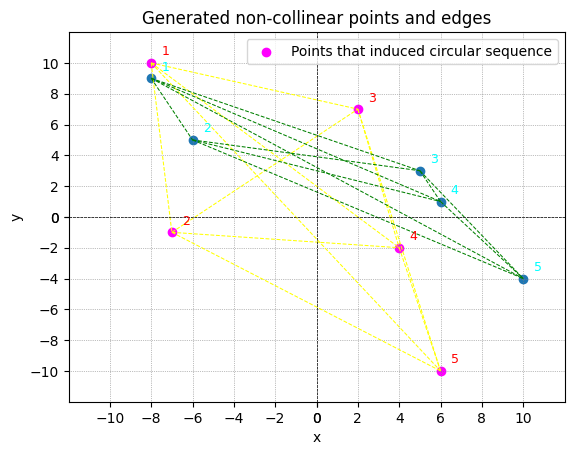

points:
x     y
-8    9
-6    5
5     3
6     1
10    -4

# verify circular sequence
circular sequence
1 2 3 4 5 
2 1 3 4 5 
2 1 4 3 5 
2 1 4 5 3 
2 1 5 4 3 
2 5 1 4 3 
2 5 4 1 3 
5 2 4 1 3 
5 2 4 3 1 
5 4 2 3 1 
5 4 3 2 1 
circular sequence matches target with 0/10 errors


In [572]:
import scipy as sp
from gekko import GEKKO
import math

def slope_compare(e1, e2):
  p11, p12 = e1
  p21, p22 = e2

  m1 = slope(p11, p12)
  m2 = slope(p21, p22)
  
  if m1 > m2:
    return -1
  if m1 == m2:
    return 0
  if m1 < m2:
    return 1

def intersection(m1, p1, m2, p2):
  x1, y1 = p1
  x2, y2 = p2

  h = (m2 * x2 - m1 * x1 - y2 + y1) / (m2 - m1)
  return h, m1 * (h - x1) + y1

def print_points_float(points, min_coord, max_coord):
  print("points:")
  pad = 2 * max(len(str(float(min_coord))), len(str(float(max_coord))))
  print("x".ljust(pad), "y")
  for p in points:
    x, y = p
    print(f"{float(x)}".ljust(pad), f"{float(y)}")

def unique_keep_order(arr):
    _, idx = np.unique(arr, return_index=True)
    return arr[np.sort(idx)]
  

def init_circular_sequence(n, safe=True):
  if safe:
    points = init_points(n, -2 * n, 2 * n) # to guarantee circular sequence is viable, generate from set of points
    slopes = generate_slopes(points)
    swaps = generate_swap_seq(points, slopes)
    circ, edg = generate_circular_sequence(n, swaps)
    return points, circ, swaps
  else:
    swappys = list(itertools.combinations(np.arange(0, n, 1), 2))
    swaps = []
    seq = list(np.arange(0, n, 1))
    while len(swaps) < len(swappys):
      sw = random.choice([(seq[i], seq[i + 1]) for i in range(n - 1) if seq[i] < seq[i + 1]])
      swaps.append(sw)
      seq[seq.index(sw[0])], seq[seq.index(sw[1])] = sw[1], sw[0]
    circ, edg = generate_circular_sequence(n, swaps)
    return circ, swaps

def generate_points_mc(n, swaps_ver, maxiter=1000):
  minerr = len(swaps_ver)
  minpoints = None

  for _ in range(maxiter):
    points = init_points(n, -2 * n, 2 * n) # to guarantee circular sequence is viable, generate from set of points
    slopes = generate_slopes(points)
    swaps = generate_swap_seq(points, slopes)
    if swaps == swaps_ver:
      return points
    if error_comp(swaps, swaps_ver) < minerr:
      minpoints = points
  
  return minpoints

def generate_points(n, circ, swaps):
  points = np.zeros((n, 2)) # store points
  slopes = np.zeros((n, n))

  hull_order1 = unique_keep_order(circ[:,0])
  hull_order2 = unique_keep_order(circ[:,-1])

  points[hull_order1, 0] = [round(n * math.cos(np.pi / max(5, (len(hull_order1) + 1 * ((len(hull_order1) - 1).bit_count() == 1))) * i)) for i in range(len(hull_order1))]
  points[hull_order1, 1] = [round(n * math.sin(np.pi / max(5, (len(hull_order1) + 1 * ((len(hull_order1) - 1).bit_count() == 1))) * i)) for i in range(len(hull_order1))]
  points[hull_order2, 0] = [-round(n * math.cos(np.pi / max(5, (len(hull_order2) + 1 * ((len(hull_order2) - 1).bit_count() == 1))) * i)) for i in range(len(hull_order2))]
  points[hull_order2, 1] = [-round(n * math.sin(np.pi / max(5, (len(hull_order2) + 1 * ((len(hull_order2) - 1).bit_count() == 1))) * i)) for i in range(len(hull_order2))]
  points[0,:] = [n, 0]
  points[-1,:] = [-n, 0]


  eps = 0.01

  m = 1 - len(hull_order1)
  for i in range(1, len(hull_order1) - 1):
    if (points[hull_order1[i]][0] > 0 and points[hull_order1[i]][1] >= 0 or points[hull_order1[i]][0] < 0 and points[hull_order1[i]][1] <= 0):
      m = -abs(m)
      m += 1
      if abs(slope(points[hull_order1[i - 1]], points[hull_order1[-1]]) - m) < eps:
        m += 1
    else:
      m = abs(m)
      m -= 1
    points[hull_order1[i]] = intersection(m, points[hull_order1[i - 1]], points[hull_order1[i]][1] / points[hull_order1[i]][0], points[hull_order1[i]])
  m = 1 - len(hull_order2)
  for i in range(1, len(hull_order2) - 1):
    if (points[hull_order2[i]][0] > 0 and points[hull_order2[i]][1] >= 0 or points[hull_order2[i]][0] < 0 and points[hull_order2[i]][1] <= 0):
      m = -abs(m)
      m += 1
    else:
      m = abs(m)
      m -= 1
      if abs(slope(points[hull_order2[i - 1]], points[hull_order2[1]]) - m) < eps:
        m -= 1
    points[hull_order2[i]] = intersection(m, points[hull_order2[i - 1]], points[hull_order2[i]][1] / points[hull_order2[i]][0], points[hull_order2[i]])
  
  print("")
  hull_order = np.concatenate((hull_order1, hull_order2[1:-1]))
  for i in range(len(hull_order)):
    sw = circ[list(swaps).index((min(hull_order[i], hull_order[(i + 2) % len(hull_order)]), max(hull_order[i], hull_order[(i + 2) % len(hull_order)])))]
    br = list(sw).index(min(hull_order[i], hull_order[(i + 2) % len(hull_order)]))
    if br + 2 < len(sw):
      traps = sw[:br] if hull_order[(i + 1) % len(hull_order)] in sw[:br] else sw[br + 2:]
    print(sw, i, traps)
  
  sloop = [(s[0], s[1]) for s in swaps if s[0] in hull_order and s[1] in hull_order and s[0] < s[1]]
  slop = sorted([(i, j) for i in range(n) for j in range(i + 1, n) if i in hull_order and j in hull_order], key=lambda p: slope(points[p[0]], points[p[1]]))


  """ix = [random.randint(-10, 10) for _ in range(n)]
  iy = [random.randint(-10, 10) for _ in range(n)]
  points[:,0] = ix
  points[:,1] = iy
  points = np.array(sorted(points, key=lambda p: p[0], reverse=True))
  print(points)
  eps = 0.01
  model = GEKKO()
  x = model.Array(model.Var,(n),lb=-100,ub=100)
  y = model.Array(model.Var,(n),lb=-100,ub=100)
  m = model.Array(model.Var,(len(swaps)),integer=True)

  model.Equations([m[i] - m[i + 1] + eps <= 0 for i in range(len(swaps) - 1)])
  model.Equations([(y[swaps[i][0] - 1] - y[swaps[i][1] - 1]) / (x[swaps[i][0] - 1] - x[swaps[i][1] - 1]) - (y[swaps[i + 1][0] - 1] - y[swaps[i + 1][1] - 1]) / (x[swaps[i + 1][0] - 1] - x[swaps[i + 1][1] - 1]) <= -eps for i in range(len(swaps) - 1)])
  model.Equations([x[i] - x[i + 1] - eps >= 0 for i in range(n - 1)])
  model.Equations([abs(x[i] - x[i + 1]) - eps >= 1 for i in range(n - 1)])
  model.Equations([abs(y[i] - y[i + 1]) - eps >= 1 for i in range(n - 1)])

  model.Maximize(sum([abs(xx) for xx in x]) + sum([abs(yy) for yy in y]))

  model.options.SOLVER = 1
  model.options.MAX_ITER = 10
  model.solve()

  print(x)
  print(y)
  for _ in range(10):
    
    slope_cons = [{'type': 'ineq', 'fun': lambda x: x[i] - x[i + 1] + eps} for i in range(2 * n, 2 * n + len(swaps) - 1)]
    point_consl = [{'type': 'ineq', 'fun': lambda x: (x[swaps[i][0] - 1 + n] - x[swaps[i][1] - 1 + n]) / (x[swaps[i][0] - 1] - x[swaps[i][1] - 1]) - x[2 * n + i]} for i in range(len(swaps))]
    point_consg = [{'type': 'ineq', 'fun': lambda x: -(x[swaps[i][0] - 1 + n] - x[swaps[i][1] - 1 + n]) / (x[swaps[i][0] - 1] - x[swaps[i][1] - 1]) + x[2 * n + i]} for i in range(len(swaps))]
    x_cons =  [{'type': 'ineq', 'fun': lambda x: x[i] - x[i + 1] + eps} for i in range(n - 1)]

    res = sp.optimize.minimize(lambda x: -(max(x[0:n]) - min(x[0:n]))-(max(x[n:2*n]) - min(x[n:2*n])), [8 for _ in range(2 * n)] + [i for i in range(len(swaps))], method='COBYLA', bounds=[(-10, 10) for _ in range(2*n)] + [(None, None) for _ in range(len(swaps))], constraints=slope_cons+point_consl+point_consg+x_cons)
    print(res.x)
  """
  return points

def error_comp(swaps1, swaps2): # lcs problem
    m = len(swaps1)

    # Initializing a matrix of size (m+1)*(n+1)
    dp = np.zeros((m + 1, m + 1))

    # Building dp[m+1][n+1] in bottom-up fashion
    for i in range(1, m + 1):
        for j in range(1, m + 1):
            if swaps1[i - 1] == swaps2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j],
                               dp[i][j - 1])

    # dp[m][n] contains length of LCS for S1[0..m-1]
    # and S2[0..n-1]
    return int(m - dp[m][m])

n = 5
safe = True

if safe:
  t_points, circ, swaps = init_circular_sequence(n, safe)
  plt.scatter(t_points[:,0], t_points[:,1], color="magenta", label="Points that induced circular sequence") # plot points
  for ind, p in enumerate(t_points): # plot labels
    plt.text(p[0] + 0.5, p[1] + 0.5, f"{ind+1}", color='red', fontsize=9)
  for e in itertools.combinations(t_points, 2): # plot edges
    x1, y1 = e[0]
    x2, y2 = e[1]
    plt.plot([x1, x2], [y1, y2], color='yellow', linestyle='--', linewidth=0.75)
  plt.legend()

else:
  circ, swaps = init_circular_sequence(n, safe)

print_circular_sequence(n, circ)
points = generate_points_mc(n, swaps)
min_coord = -10
max_coord = 10
step = 2
ext = 2

plt.scatter(points[:,0], points[:,1], label="Generated points") # plot points
for ind, p in enumerate(points): # plot labels
  plt.text(p[0] + 0.5, p[1] + 0.5, f"{ind+1}", color='cyan', fontsize=9)
for e in itertools.combinations(points, 2): # plot edges
  x1, y1 = e[0]
  x2, y2 = e[1]
  plt.plot([x1, x2], [y1, y2], color='green', linestyle='--', linewidth=0.75)

# visuals
plt.ylim(min_coord - ext, max_coord + ext)
plt.xlim(min_coord - ext, max_coord + ext)
ticks = np.concatenate((np.arange(0, min_coord - ext, -step), np.arange(0, max_coord + ext, step)))
plt.yticks(ticks)
plt.xticks(ticks)
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axvline(0, color='black', linewidth=0.5, linestyle='--') 
plt.grid(color='gray', linestyle=':', linewidth=0.5)
plt.title('Generated non-collinear points and edges')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print_points_int(points, min_coord, max_coord)

slopes = generate_slopes(points)
swaps_ver = generate_swap_seq(points, slopes)
circ_ver, edg = generate_circular_sequence(n, swaps_ver)
print("")
print("# verify circular sequence")
print_circular_sequence(n, circ_ver)
print("circular sequence matches target with", str(error_comp(swaps, swaps_ver)) + "/" + str(len(swaps)), "errors")